In [1]:
import pandas as pd
import requests 

In [2]:
import sys
!{sys.executable} -m pip install selenium

  Using cached selenium-3.141.0-py2.py3-none-any.whl (904 kB)


In [3]:
from selenium import webdriver
from PIL import Image
import requests
import urllib.request
import os

In [4]:

driver = webdriver.Chrome("/Users/altheachan/Downloads/chromedriver_new")
driver.get("https://food.ndtv.com/recipes")

In [5]:
def get_link_by_text(text):
    """Find link in the page with given text"""
    element = driver.find_element_by_link_text(text.strip())
    return element.get_attribute("href")

def get_list_by_class_name(class_name="main_image "):
    """Get list of text in all element by class_name"""
    element_list = []
    try:
        all_elements = driver.find_elements_by_class_name(class_name)
        element_list = [x.text for x in all_elements if len(x.text) > 0]
    except (NoSuchElementException, WebDriverException) as e:
        print(e)
    return element_list

category_links = {x: get_link_by_text(x)
                  for x in get_list_by_class_name('recipe-tab-heading')}

category_links1 = list(category_links.items())[0]
category_links1

('CATEGORIES', 'https://food.ndtv.com/recipes')

In [6]:
sub_category_links = {}

driver.get(url = category_links1[1])  # open url in chrome

sub_category_list = get_list_by_class_name("main_image ")
sub_category_links[category_links1[0]] = {x: get_link_by_text(x) 
                                    for x in sub_category_list}
sub_category_links

{'CATEGORIES': {'ACCOMPANIMENTS': 'https://food.ndtv.com/recipes/accompaniments-recipes',
  'BACK TO BASICS': 'https://food.ndtv.com/recipes/back-to-basics-recipes',
  'BEVERAGES': 'https://food.ndtv.com/recipes/beverages-recipes',
  'BREADS': 'https://food.ndtv.com/recipes/breads-recipes',
  'CHICKEN': 'https://food.ndtv.com/recipes/chicken-recipes',
  'DESSERTS': 'https://food.ndtv.com/recipes/desserts-recipes',
  'EGGS': 'https://food.ndtv.com/recipes/eggs-recipes',
  'HEALTHY': 'https://food.ndtv.com/recipes/healthy-recipes',
  'INDIAN BREADS': 'https://food.ndtv.com/recipes/indian-breads-recipes',
  'INDIAN DESSERTS': 'https://food.ndtv.com/recipes/indian-desserts-recipes',
  'KIDS': 'https://food.ndtv.com/recipes/kids-recipes',
  'LOW FAT': 'https://food.ndtv.com/recipes/low-fat-recipes',
  'MEAT': 'https://food.ndtv.com/recipes/meat-recipes',
  'PASTA AND NOODLES': 'https://food.ndtv.com/recipes/pasta-and-noodles-recipes',
  'QUICK AND EASY': 'https://food.ndtv.com/recipes/quick

In [7]:
import time
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import WebDriverException
def keep_clicking_show_more():
    """Loop till show_more doesn't have anything to load."""
    while True:
        try:
            driver.find_element_by_link_text('Show More').click()

            # Wait till the container of the recipes gets loaded 
            # after load more is clicked.
            time.sleep(5)

            recipe_container = driver.find_element_by_id("recipeListing")
            if 'No Record Found' in recipe_container.text:
                break
        except (NoSuchElementException, WebDriverException) as e:
            break

In [8]:
all_recipe_links = {}
for category, urls in sub_category_links.items():
    if category == 'CHEFS':
        # we want to ignore chefs.
        continue
    elif category == 'MEMBER RECIPES':
        # there's no additional tree traversal for member recipes
        all_recipe_links[category] = {
            'dummy_sub_category': urls
        }
    else:
        all_recipe_links[category] = {}
        for sub_category, url in urls.items():
            driver.get(url)
            keep_clicking_show_more()
            all_recipe_links[category][sub_category] = {
                x: get_link_by_text(x)
                for x in get_list_by_class_name("main_image ")
            }
all_recipe_links

{'CATEGORIES': {'ACCOMPANIMENTS': {'Onion Salan': 'https://food.ndtv.com/recipe-onion-salan-955674',
   'Pineapple Rasam': 'https://food.ndtv.com/recipe-pineapple-rasam-955237',
   'Nilakadalai Chutney': 'https://food.ndtv.com/recipe-nilakadalai-chutney-955208',
   'All-Purpose Garlic Chutney Powder': 'https://food.ndtv.com/recipe-all-purpose-garlic-chutney-powder-955186',
   'Aam Ka Chunda': 'https://food.ndtv.com/recipe-aam-ka-chunda-955119',
   'Laccha Aloo Sooji Pakoda Recipe': 'https://food.ndtv.com/recipe-laccha-aloo-sooji-pakoda-recipe-955070',
   'Chicken Kabsa : Arabian Style Chicken And Rice': 'https://food.ndtv.com/recipe-chicken-kabsa-arabian-style-chicken-and-rice-955050',
   'Almond Strawberry Cream': 'https://food.ndtv.com/recipe-almond-strawberry-cream-953348',
   'Tricolour Salad': 'https://food.ndtv.com/recipe-tricolour-salad-953269',
   'Chocolate Nero Cookies': 'https://food.ndtv.com/recipe-chocolate-nero-cookies-953038',
   'Broccoli And Almond Soup': 'https://food

In [9]:
saved_link = all_recipe_links
saved_link

{'CATEGORIES': {'ACCOMPANIMENTS': {'Onion Salan': 'https://food.ndtv.com/recipe-onion-salan-955674',
   'Pineapple Rasam': 'https://food.ndtv.com/recipe-pineapple-rasam-955237',
   'Nilakadalai Chutney': 'https://food.ndtv.com/recipe-nilakadalai-chutney-955208',
   'All-Purpose Garlic Chutney Powder': 'https://food.ndtv.com/recipe-all-purpose-garlic-chutney-powder-955186',
   'Aam Ka Chunda': 'https://food.ndtv.com/recipe-aam-ka-chunda-955119',
   'Laccha Aloo Sooji Pakoda Recipe': 'https://food.ndtv.com/recipe-laccha-aloo-sooji-pakoda-recipe-955070',
   'Chicken Kabsa : Arabian Style Chicken And Rice': 'https://food.ndtv.com/recipe-chicken-kabsa-arabian-style-chicken-and-rice-955050',
   'Almond Strawberry Cream': 'https://food.ndtv.com/recipe-almond-strawberry-cream-953348',
   'Tricolour Salad': 'https://food.ndtv.com/recipe-tricolour-salad-953269',
   'Chocolate Nero Cookies': 'https://food.ndtv.com/recipe-chocolate-nero-cookies-953038',
   'Broccoli And Almond Soup': 'https://food

In [10]:
from bs4 import BeautifulSoup
import requests

url = 'https://www.allrecipes.com/recipe/280935/air-fryer-tilapia-with-fresh-lemon-pepper/'
html_doc = requests.get(url).content
soup = BeautifulSoup(html_doc, 'html.parser')

In [11]:
def get_namecontainer():
    name_container = soup.find("div", {"class": "recp-det-cont"})
    return name_container

In [12]:
# name was in h1 html tag inside recipe container div
def get_name():
    recipe_name = name_container.find('h1').get_text().strip()
    return recipe_name

In [13]:
#("fieldset", {"class": "ingredients-section__fieldset"})
def get_recipecontainer():
    recipe_container = soup.find('div', {'class': 'art_imgwrap'}).picture.img['src']
    return recipe_container

In [14]:
# ingredients
def get_ingredients():
    recipe_ingredients = get_recipecontainer().find('ul', {"class": "ingredients-section"})
    ingredients = [x.get_text().strip()
                   for x in recipe_ingredients.find_all('li')]
    return ingredients


In [15]:
list_form = list(saved_link.items())[0][1]
list_form

{'ACCOMPANIMENTS': {'Onion Salan': 'https://food.ndtv.com/recipe-onion-salan-955674',
  'Pineapple Rasam': 'https://food.ndtv.com/recipe-pineapple-rasam-955237',
  'Nilakadalai Chutney': 'https://food.ndtv.com/recipe-nilakadalai-chutney-955208',
  'All-Purpose Garlic Chutney Powder': 'https://food.ndtv.com/recipe-all-purpose-garlic-chutney-powder-955186',
  'Aam Ka Chunda': 'https://food.ndtv.com/recipe-aam-ka-chunda-955119',
  'Laccha Aloo Sooji Pakoda Recipe': 'https://food.ndtv.com/recipe-laccha-aloo-sooji-pakoda-recipe-955070',
  'Chicken Kabsa : Arabian Style Chicken And Rice': 'https://food.ndtv.com/recipe-chicken-kabsa-arabian-style-chicken-and-rice-955050',
  'Almond Strawberry Cream': 'https://food.ndtv.com/recipe-almond-strawberry-cream-953348',
  'Tricolour Salad': 'https://food.ndtv.com/recipe-tricolour-salad-953269',
  'Chocolate Nero Cookies': 'https://food.ndtv.com/recipe-chocolate-nero-cookies-953038',
  'Broccoli And Almond Soup': 'https://food.ndtv.com/recipe-broccoli

In [22]:
html_doc = requests.get(list_form['ACCOMPANIMENTS']['Onion Salan']).content
soup = BeautifulSoup(html_doc, 'html.parser')
name_container = soup.find("div", {"class": "recp-det-cont"})
recipe_container = soup.find("div", {"class": "recp-det-cont"})
recipe_ingredients = recipe_container.find('div', {"class": "ingredients"})
ingredients = [x.get_text().strip()
               for x in recipe_ingredients.find_all('li')]
#ingredients

AttributeError: 'NoneType' object has no attribute 'find'

In [21]:
ingredients

NameError: name 'ingredients' is not defined

In [17]:
recipe_names = []
recipe_ingredients_list = []
for category in list_form:
    for name in list_form[category]:
        url = list_form[category][name]
        html_doc = requests.get(url).content
        soup = BeautifulSoup(html_doc, 'html.parser')
        #name_container = soup.find("div", {"class": "recp-det-cont"})
        recipe_container = soup.find("div", {"class": "recp-det-cont"})
        name = recipe_container.find('h1').get_text().strip()
        recipe_ingredients = recipe_container.find('div', {"class": "ingredients"})
        ingredients = [x.get_text().strip()
               for x in recipe_ingredients.find_all('li')]
        recipe_names.append(name)
        recipe_ingredients_list.append(ingredients)

AttributeError: 'NoneType' object has no attribute 'find'

In [ ]:
pd.reset_option('^display.', silent=True)

In [665]:
recipe_names

['Almond Strawberry Cream Recipe',
 'Tricolour Salad Recipe',
 'Chocolate Nero Cookies Recipe',
 'Broccoli and Almond Soup Recipe',
 'Strawberry Parfait Recipe',
 'Kurkuri dahi Recipe',
 'Seb Aur Badaam Ka Shorba Recipe',
 'Baked Namakpara with Roasted Almond Dip Recipe',
 'Checkerboard Cookies Recipe',
 'Valencia Fizz Recipe',
 'Baked Namak Para Recipe',
 'City of Tree Recipe',
 'Above the Cloud Recipe',
 'Butter Scotch Cookies Recipe',
 'Date And Pistachio Muffin Recipe',
 'Babaganoush Margarita Recipe',
 'Badam ka Kahwa Recipe',
 'Red Wine Braised Mushroom Flatbread Recipe',
 'Mixed Vegetable Soup Recipe',
 'Spicy Paneer with Beetroot & Cranberry Chutney Recipe',
 'Sangria Jelly Recipe',
 'Tutty Fruity Margarita Recipe',
 'Cucumber Salad on Himalayan Salt Block Recipe',
 'Fresh Mango Mary Recipe',
 'Kairi Aani Kothimbiricha Tikhat Jam (Spicy Raw Mango Jam) Recipe',
 'Kairi Aani Kandyache Takku (Grated Raw Mango & Onion Pickle) Recipe',
 'Mango Mastani Recipe',
 'Chamomile Vodka Cool

In [20]:
recipe_ingredients_list

[['1/2 Cup almonds',
  '12-14 pieces fresh strawberries',
  '1 cup whipped cream',
  '1 tsp holy basil leaves (tulsi)',
  '3 tbsp sugar, powdered'],
 ['For dressing:',
  '1/3 cup vinegar',
  '3 tbsp honey/sugar',
  '1 tbsp soy sauce',
  '1 tsp salt',
  '2  garlic cloves (minced)',
  '1-2  chilli pepper (sliced), sliced',
  'For salad:',
  '1 medium green papaya',
  '1 large carrot (peeled), julienne',
  '1-2  cucumbers, julienne',
  '1/3 cup mint leaves, chopped',
  '4 tbsp toasted peanuts'],
 ['1  almonds',
  '2  eggs',
  '1/3  granulated sugar',
  '2  bittersweet chocolate',
  '2  unsalted butter',
  '1/2  flour',
  '1  baking powder',
  'To roll  castor sugar',
  'To roll  icing sugar'],
 ['800 Ml vegetable stock',
  '700 gms broccoli',
  '50 gms ground almonds (toasted)',
  '250 ml skimmed milk',
  'to taste salt',
  'to taste freshly ground black pepper'],
 ['50 gms muesli',
  '50 gms curd',
  '30 gms strawberry puree',
  '20 gms honey',
  '10 gms maple syrup'],
 ['250 gms curd',


In [668]:
saved_list = recipe_ingredients_list


In [22]:
saved_name = recipe_names
saved_name

['Almond Strawberry Cream Recipe',
 'Tricolour Salad Recipe',
 'Chocolate Nero Cookies Recipe',
 'Broccoli and Almond Soup Recipe',
 'Strawberry Parfait Recipe',
 'Kurkuri dahi Recipe',
 'Seb Aur Badaam Ka Shorba Recipe',
 'Baked Namakpara with Roasted Almond Dip Recipe',
 'Checkerboard Cookies Recipe',
 'Valencia Fizz Recipe',
 'Baked Namak Para Recipe',
 'City of Tree Recipe',
 'Above the Cloud Recipe',
 'Butter Scotch Cookies Recipe',
 'Date And Pistachio Muffin Recipe',
 'Babaganoush Margarita Recipe',
 'Badam ka Kahwa Recipe',
 'Red Wine Braised Mushroom Flatbread Recipe',
 'Mixed Vegetable Soup Recipe',
 'Spicy Paneer with Beetroot & Cranberry Chutney Recipe',
 'Sangria Jelly Recipe',
 'Tutty Fruity Margarita Recipe',
 'Cucumber Salad on Himalayan Salt Block Recipe',
 'Fresh Mango Mary Recipe',
 'Kairi Aani Kothimbiricha Tikhat Jam (Spicy Raw Mango Jam) Recipe',
 'Kairi Aani Kandyache Takku (Grated Raw Mango & Onion Pickle) Recipe',
 'Mango Mastani Recipe',
 'Chamomile Vodka Cool

In [23]:
data_final = {"Recipe Name": saved_name, "Recipe Ingredients":saved_list}

In [24]:
import numpy as np
df_final_recipe = pd.DataFrame(data=data_final)
df_final_recipe

,Recipe Name,Recipe Ingredients
0,Almond Strawberry Cream Recipe,"[1/2 Cup almonds, 12-14 pieces fresh strawberr..."
1,Tricolour Salad Recipe,"[For dressing:, 1/3 cup vinegar, 3 tbsp honey/..."
2,Chocolate Nero Cookies Recipe,"[1 almonds, 2 eggs, 1/3 granulated sugar, 2..."
3,Broccoli and Almond Soup Recipe,"[800 Ml vegetable stock, 700 gms broccoli, 50 ..."
4,Strawberry Parfait Recipe,"[50 gms muesli, 50 gms curd, 30 gms strawberry..."
...,...,...
1912,Kaju and Pista Roll Recipe,"[700 gms cashew nuts, 300 gms pista, 800 gms s..."
1913,Steamed Sandesh Recipe,"[7 Litre milk, 300 sugar, 10 green cardamom,..."
1914,Ariselu Recipe,"[1/2 Cup rice, 1/2 cup jaggery, 1 cup water, 1..."
1915,Anjeer Kaju Roll Recipe,"[1 Kg cashew nuts, 500 gms figs, 500 gms sugar..."


In [25]:
allergen = {"dairy": ["Butter", "Buttermilk", "Casein", "casein hydrolysate", "caseinates",
    "Cheese", "Cottage cheese", "Cream" ,"Curds" ,"Diacetyl" ,"Ghee" ,"Lactalbumin"
    "Lactoferrin" ,"Lactose", "lactulose" ,"Milk" ,"Recaldent", "Rennet casein" ,"Sour cream" ,"Whey", "half and half", 
                     'dairy'], 
            "eggs" : ["Albumin", "albumen", "Egg", "egg white", "egg yolk", "Eggnog", "Lysozyme",
    "Mayonnaise", "Meringue", "Ovalbumin", "Surimi", 'eggs', 'egg whites'], 
            "sesame" : ["sesamol", "benne seed", "sesame", "sesame oil" , "tahini", 'sesame seed', 'sesame seeds'], 
            "shellfish": ["Barnacle", "Crab", "Crawfish" , "crawdad", "crayfish", "ecrevisse", 
    "Krill", "Lobster" , "langouste", "langoustine", "Moreton bay bugs", "scampi", "tomalley",
    "Prawns", "Shrimp", "crevette", "scampi", 'shellfish'], 
            "fish": ['fish', "Anchovies", "Bass", "Catfish",  "Cod", "Flounder",
    "Grouper", "Haddock", "Hake", "Halibut", "Herring", "Mahi mahi", "Perch", "Pike","Pollock", "Salmon",
    "Scrod", "Sole", "Snapper", "Swordfish", "Tilapia", "Trout", "Tuna"],
           "peanuts" : ["Peanut", "Peanuts", "Arachis oil", "Artificial nuts", "Beer nuts", "peanut oil", "Goobers"
    "Ground nuts", "Lupin", "lupine", "Mandelonas", "Mixed nuts", "Monkey nuts", "Nut meat",
    "Nut pieces", "Peanut butter", "Peanut flour", "Peanut protein hydrolysate"], 
           "soy": ["soy oil", "Edamame", "Miso", "Natto", "Shoyu", "Soy", "soy albumin", 
    "soy cheese", "soy fiber", "soy flour", "soy grits", "soy ice cream", "soy milk", "soy nuts", 
    "soy sprouts", "soy yogurt", "Soya", "Soybean", "Soy protein", "Soy sauce", "Tamari",
    "Tempeh", "Textured vegetable protein", "TVP", "Tofu"], 
           "wheat": ['gluten', "Bread", "crumbs", "Bulgur", "Cereal extract", "Club wheat", "Couscous",
    "Cracker meal", "Durum", "Einkorn", "Emmer", "Farina", "Farro", "Flour", "Freekeh", 
    "Hydrolyzed wheat protein", "Kamut", "Matzoh", "matzoh meal", "matzo", "matzah" , "matza",
    "Pasta", "Seitan", "Semolina" ,"Spelt", "Sprouted wheat", "Triticale", "Vital wheat gluten",
    "Wheat", "Wheat bran hydrolysate", "Wheat germ oil", "Wheat grass", "Wheat protein isolate",
    "Whole wheat berries"],
           "tree nuts" : ["Almond", "almonds","Artificial nuts", "Beechnut", "Black walnut hull extract (flavoring)", 
    "Brazil nut", "Cashew", "cashews", "Chestnut", "Chinquapin nut"
"Coconut","hazelnut","Gianduja","Ginkgo nut","Hickory nut","lychee nut","Macadamia nut","Marzipan/almond paste",
    "Nangai nut","Natural nut extract","Nut butters","cashew butter", "almond butter","Nut distillates/alcoholic extracts",
    "Nut meal","Nut meat","Nut milk","almond milk", "cashew milk","Nut oils","walnut oil", "almond oil",
    "Nut paste", "almond paste","Nut pieces","Pecan","Pesto","Pili nut","Pine nut","Pistachio","Praline","Shea nut",
                          "Walnut","Walnut hull extract"]}

In [263]:
allergen_df = pd.DataFrame(allergen.items(), columns = ['Allergen', "Affected Ingredients"])
allergen_df

,Allergen,Affected Ingredients
0,dairy,"[butter, buttermilk, casein, casein hydrolysat..."
1,eggs,"[albumin, albumen, egg, egg white, egg yolk, e..."
2,sesame,"[sesamol, benne seed, sesame, sesame oil, tahi..."
3,shellfish,"[barnacle, crab, crawfish, crawdad, crayfish, ..."
4,fish,"[fish, anchovies, bass, catfish, cod, flounder..."
5,peanuts,"[peanut, peanuts, arachis oil, artificial nuts..."
6,soy,"[soy oil, edamame, miso, natto, shoyu, soy, so..."
7,wheat,"[gluten, bread, crumbs, bulgur, cereal extract..."
8,tree nuts,"[almond, almonds, artificial nuts, beechnut, b..."


In [27]:
for i in range(len(allergen_df)):
    for j in range(len(allergen_df["Affected Ingredients"][i])):
        allergen_df['Affected Ingredients'][i][j] = allergen_df['Affected Ingredients'][i][j].lower()

In [1]:
allergen_df.show()

NameError: name 'allergen_df' is not defined

In [29]:
def convert(lst):
    return ([i for item in lst for i in item.split()])
for i in range(len(df_final_recipe)):
     df_final_recipe['Recipe Ingredients'][i] = convert(df_final_recipe['Recipe Ingredients'][i])
     for j in range(len(df_final_recipe["Recipe Ingredients"][i])):
        df_final_recipe['Recipe Ingredients'][i][j] = df_final_recipe['Recipe Ingredients'][i][j].lower()

In [30]:
for i in range(len(df_final_recipe)):
    df_final_recipe['Recipe Name'][i] = df_final_recipe['Recipe Name'][i].lower()

In [31]:
list_allergies = allergen_df['Allergen'].tolist()
list_allergies

['dairy',
 'eggs',
 'sesame',
 'shellfish',
 'fish',
 'peanuts',
 'soy',
 'wheat',
 'tree nuts']

In [32]:
df_final_recipe[list_allergies] = 0
df_final_recipe = df_final_recipe
df_final_recipe

,Recipe Name,Recipe Ingredients,dairy,eggs,sesame,shellfish,fish,peanuts,soy,wheat,tree nuts
0,almond strawberry cream recipe,"[1/2, cup, almonds, 12-14, pieces, fresh, stra...",0,0,0,0,0,0,0,0,0
1,tricolour salad recipe,"[for, dressing:, 1/3, cup, vinegar, 3, tbsp, h...",0,0,0,0,0,0,0,0,0
2,chocolate nero cookies recipe,"[1, almonds, 2, eggs, 1/3, granulated, sugar, ...",0,0,0,0,0,0,0,0,0
3,broccoli and almond soup recipe,"[800, ml, vegetable, stock, 700, gms, broccoli...",0,0,0,0,0,0,0,0,0
4,strawberry parfait recipe,"[50, gms, muesli, 50, gms, curd, 30, gms, stra...",0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1912,kaju and pista roll recipe,"[700, gms, cashew, nuts, 300, gms, pista, 800,...",0,0,0,0,0,0,0,0,0
1913,steamed sandesh recipe,"[7, litre, milk, 300, sugar, 10, green, cardam...",0,0,0,0,0,0,0,0,0
1914,ariselu recipe,"[1/2, cup, rice, 1/2, cup, jaggery, 1, cup, wa...",0,0,0,0,0,0,0,0,0
1915,anjeer kaju roll recipe,"[1, kg, cashew, nuts, 500, gms, figs, 500, gms...",0,0,0,0,0,0,0,0,0


In [33]:
df_final_recipe.to_pickle("food_allergen_df_final.pkl")

In [34]:
for i in range(len(df_final_recipe)):
    for j in range(len(allergen_df)):
        for k in range(len(allergen_df['Affected Ingredients'][j])):
            if allergen_df['Affected Ingredients'][j][k] in df_final_recipe['Recipe Ingredients'][i]:
                df_final_recipe.loc[i, allergen_df['Allergen'][j]] = 1

In [35]:
df_final_recipe.head()

,Recipe Name,Recipe Ingredients,dairy,eggs,sesame,shellfish,fish,peanuts,soy,wheat,tree nuts
0,almond strawberry cream recipe,"[1/2, cup, almonds, 12-14, pieces, fresh, stra...",1,0,0,0,0,0,0,0,1
1,tricolour salad recipe,"[for, dressing:, 1/3, cup, vinegar, 3, tbsp, h...",0,0,0,0,0,1,1,0,0
2,chocolate nero cookies recipe,"[1, almonds, 2, eggs, 1/3, granulated, sugar, ...",1,1,0,0,0,0,0,1,1
3,broccoli and almond soup recipe,"[800, ml, vegetable, stock, 700, gms, broccoli...",1,0,0,0,0,0,0,0,1
4,strawberry parfait recipe,"[50, gms, muesli, 50, gms, curd, 30, gms, stra...",0,0,0,0,0,0,0,0,0


In [36]:
pd.read_pickle("food_allergen_df_final.pkl")

,Recipe Name,Recipe Ingredients,dairy,eggs,sesame,shellfish,fish,peanuts,soy,wheat,tree nuts
0,almond strawberry cream recipe,"[1/2, cup, almonds, 12-14, pieces, fresh, stra...",0,0,0,0,0,0,0,0,0
1,tricolour salad recipe,"[for, dressing:, 1/3, cup, vinegar, 3, tbsp, h...",0,0,0,0,0,0,0,0,0
2,chocolate nero cookies recipe,"[1, almonds, 2, eggs, 1/3, granulated, sugar, ...",0,0,0,0,0,0,0,0,0
3,broccoli and almond soup recipe,"[800, ml, vegetable, stock, 700, gms, broccoli...",0,0,0,0,0,0,0,0,0
4,strawberry parfait recipe,"[50, gms, muesli, 50, gms, curd, 30, gms, stra...",0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1912,kaju and pista roll recipe,"[700, gms, cashew, nuts, 300, gms, pista, 800,...",0,0,0,0,0,0,0,0,0
1913,steamed sandesh recipe,"[7, litre, milk, 300, sugar, 10, green, cardam...",0,0,0,0,0,0,0,0,0
1914,ariselu recipe,"[1/2, cup, rice, 1/2, cup, jaggery, 1, cup, wa...",0,0,0,0,0,0,0,0,0
1915,anjeer kaju roll recipe,"[1, kg, cashew, nuts, 500, gms, figs, 500, gms...",0,0,0,0,0,0,0,0,0


In [37]:
X = df_final_recipe['Recipe Name']

In [38]:
y = df_final_recipe[list_allergies]

In [39]:
y

,dairy,eggs,sesame,shellfish,fish,peanuts,soy,wheat,tree nuts
0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,1,0,0
2,1,1,0,0,0,0,0,1,1
3,1,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1912,0,0,0,0,0,0,0,0,1
1913,1,0,0,0,0,0,0,0,0
1914,1,0,1,0,0,0,0,0,0
1915,0,0,0,0,0,0,0,0,1


In [40]:
df_final_recipe['Split Recipe Name'] = df_final_recipe['Recipe Name'].str.split()
df_final_recipe

,Recipe Name,Recipe Ingredients,dairy,eggs,sesame,shellfish,fish,peanuts,soy,wheat,tree nuts,Split Recipe Name
0,almond strawberry cream recipe,"[1/2, cup, almonds, 12-14, pieces, fresh, stra...",1,0,0,0,0,0,0,0,1,"[almond, strawberry, cream, recipe]"
1,tricolour salad recipe,"[for, dressing:, 1/3, cup, vinegar, 3, tbsp, h...",0,0,0,0,0,1,1,0,0,"[tricolour, salad, recipe]"
2,chocolate nero cookies recipe,"[1, almonds, 2, eggs, 1/3, granulated, sugar, ...",1,1,0,0,0,0,0,1,1,"[chocolate, nero, cookies, recipe]"
3,broccoli and almond soup recipe,"[800, ml, vegetable, stock, 700, gms, broccoli...",1,0,0,0,0,0,0,0,1,"[broccoli, and, almond, soup, recipe]"
4,strawberry parfait recipe,"[50, gms, muesli, 50, gms, curd, 30, gms, stra...",0,0,0,0,0,0,0,0,0,"[strawberry, parfait, recipe]"
...,...,...,...,...,...,...,...,...,...,...,...,...
1912,kaju and pista roll recipe,"[700, gms, cashew, nuts, 300, gms, pista, 800,...",0,0,0,0,0,0,0,0,1,"[kaju, and, pista, roll, recipe]"
1913,steamed sandesh recipe,"[7, litre, milk, 300, sugar, 10, green, cardam...",1,0,0,0,0,0,0,0,0,"[steamed, sandesh, recipe]"
1914,ariselu recipe,"[1/2, cup, rice, 1/2, cup, jaggery, 1, cup, wa...",1,0,1,0,0,0,0,0,0,"[ariselu, recipe]"
1915,anjeer kaju roll recipe,"[1, kg, cashew, nuts, 500, gms, figs, 500, gms...",0,0,0,0,0,0,0,0,1,"[anjeer, kaju, roll, recipe]"


In [70]:
from IPython.display import display, HTML

display(HTML(df_final_recipe.to_html())).show()

,Recipe Name,Recipe Ingredients,dairy,eggs,sesame,shellfish,fish,peanuts,soy,wheat,tree nuts,Split Recipe Name
0,almond strawberry cream recipe,"[1/2, cup, almonds, 12-14, pieces, fresh, strawberries, 1, cup, whipped, cream, 1, tsp, holy, basil, leaves, (tulsi), 3, tbsp, sugar,, powdered]",1,0,0,0,0,0,0,0,1,"[almond, strawberry, cream, recipe]"
1,tricolour salad recipe,"[for, dressing:, 1/3, cup, vinegar, 3, tbsp, honey/sugar, 1, tbsp, soy, sauce, 1, tsp, salt, 2, garlic, cloves, (minced), 1-2, chilli, pepper, (sliced),, sliced, for, salad:, 1, medium, green, papaya, 1, large, carrot, (peeled),, julienne, 1-2, cucumbers,, julienne, 1/3, cup, mint, leaves,, chopped, 4, tbsp, toasted, peanuts]",0,0,0,0,0,1,1,0,0,"[tricolour, salad, recipe]"
2,chocolate nero cookies recipe,"[1, almonds, 2, eggs, 1/3, granulated, sugar, 2, bittersweet, chocolate, 2, unsalted, butter, 1/2, flour, 1, baking, powder, to, roll, castor, sugar, to, roll, icing, sugar]",1,1,0,0,0,0,0,1,1,"[chocolate, nero, cookies, recipe]"
3,broccoli and almond soup recipe,"[800, ml, vegetable, stock, 700, gms, broccoli, 50, gms, ground, almonds, (toasted), 250, ml, skimmed, milk, to, taste, salt, to, taste, freshly, ground, black, pepper]",1,0,0,0,0,0,0,0,1,"[broccoli, and, almond, soup, recipe]"
4,strawberry parfait recipe,"[50, gms, muesli, 50, gms, curd, 30, gms, strawberry, puree, 20, gms, honey, 10, gms, maple, syrup]",0,0,0,0,0,0,0,0,0,"[strawberry, parfait, recipe]"
5,kurkuri dahi recipe,"[250, gms, curd, 50, gms, paneer, 2, gms, coriander, seed, 15, gms, fresh, coriander, 30, gms, milk, powder, 2, gms, green, chilli,, chopped, to, taste, salt, 2, gms, chilli, flakes, 30, gms, corn, flour, 16, gms, bread, crumbs, oil, for, frying]",1,0,0,0,0,0,0,1,0,"[kurkuri, dahi, recipe]"
6,seb aur badaam ka shorba recipe,"[150, almond,, peeled, 20, ginger, 5, white, pepper, powder, 10, honey, 2, jeera, for, topping, cream, 10, refined, oil, 5, shahijeera, 5, saunf, 2, cinnamon, to, taste, salt, 200, veg, stock]",1,0,0,0,0,0,0,0,0,"[seb, aur, badaam, ka, shorba, recipe]"
7,baked namakpara with roasted almond dip recipe,"[for, almond, dip:, 1/2, cup, almonds, (crushed),, roasted, 1, cup, tomato,, chopped, 2, nos, garlic, cloves, 1, basil, sprig, 1/2, lemon, 1/2, tsp, salt, 1/2, tsp, pepper, for, namak, para:, 250, gms, refined, flour, 10, gms, sugar, 1, tsp, salt, 20, ml, olive, oil, 150, ml, water]",0,0,0,0,0,0,0,1,1,"[baked, namakpara, with, roasted, almond, dip, recipe]"
8,checkerboard cookies recipe,"[2000, gms, refined, flour, (maida), 1000, gms, sugar, 1000, gms, butter, 50, gms, milk, powder, 10, gms, baking, powder, 20, gms, vanilla, powder, 20, gms, glucose, powder, 10, gms, caramel, colour]",1,0,0,0,0,0,0,1,0,"[checkerboard, cookies, recipe]"
9,valencia fizz recipe,"[100, ml, valencia, orange, juice, 75, ml, soda, 1, lemon, slices, 2, tbsp, lemon, juice, as, required, sugar]",0,0,0,0,0,0,0,0,0,"[valencia, fizz, recipe]"


AttributeError: 'NoneType' object has no attribute 'show'

In [472]:
appendages = pd.DataFrame()
for i in range(len(df_final_recipe)):
    new_lst = []
    for j in df_final_recipe['Split Recipe Name'][i]:
        new_row = df_final_recipe.iloc[i, 2:11].append(pd.Series(j), ignore_index = True)
        appendages = appendages.append(new_row, ignore_index = True)

In [473]:
appendages.head(15)

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,almond
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,strawberry
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,cream
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,recipe
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,tricolour
5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,salad
6,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,recipe
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,chocolate
8,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,nero
9,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,cookies


In [557]:

appendages = appendages[~appendages[9].isin(['recipe', 'with', "and", "&"])]
appendages

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,almond
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,strawberry
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,cream
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,tricolour
...,...,...,...,...,...,...,...,...,...,...
8035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,kaju
8036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,roll
8038,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,chocolate
8039,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,samosa


In [558]:
appendages_copy = appendages
list_allergies

['dairy',
 'eggs',
 'sesame',
 'shellfish',
 'fish',
 'peanuts',
 'soy',
 'wheat',
 'tree nuts']

In [559]:
renamed_appendages = appendages_copy.rename(columns = {0 : "dairy", 1: "eggs", 2: "sesame", 3: "shellfish", 
                                  4: "fish", 5: "peanuts", 6: "soy", 7:"wheat", 8:"tree nuts", 9: "recipe element"})
renamed_appendages

,dairy,eggs,sesame,shellfish,fish,peanuts,soy,wheat,tree nuts,recipe element
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,almond
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,strawberry
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,cream
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,tricolour
...,...,...,...,...,...,...,...,...,...,...
8035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,kaju
8036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,roll
8038,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,chocolate
8039,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,samosa


In [560]:
appendages

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,almond
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,strawberry
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,cream
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,tricolour
...,...,...,...,...,...,...,...,...,...,...
8035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,kaju
8036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,roll
8038,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,chocolate
8039,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,samosa


In [561]:
#0
X0 = appendages.iloc[:, 9].values
y0 = appendages.iloc[:, 0].values

# Building a TF IDF matrix out of the corpus of reviews
from sklearn.feature_extraction.text import TfidfVectorizer
td0 = TfidfVectorizer(max_features = 4500)
X0 = td0.fit_transform(X0).toarray()

from sklearn.model_selection import train_test_split
X_train0, X_test0, y_train0, y_test0 = train_test_split(X0, y0, test_size = 0.3,
                                                    random_state = 0)

# Training the classifier & predicting on test data
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train0, y_train0)

y_pred0 = classifier.predict(X_test0)

# Classification metrics
from sklearn.metrics import accuracy_score, classification_report
classification_report0 = classification_report(y_test0, y_pred0)

In [562]:
print(X_train0.shape, y_train0.shape)

(4039, 1423) (4039,)


In [563]:
#1
X1 = appendages.iloc[:, 9].values
y1 = appendages.iloc[:, 1].values

# Building a TF IDF matrix out of the corpus of reviews
from sklearn.feature_extraction.text import TfidfVectorizer
td1 = TfidfVectorizer(max_features = 4500)
X1 = td1.fit_transform(X1).toarray()

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3,
                                                    random_state = 0)

# Training the classifier & predicting on test data
from sklearn.naive_bayes import MultinomialNB
classifier1 = MultinomialNB()
classifier1.fit(X_train1, y_train1)

y_pred1 = classifier.predict(X_test1)

# Classification metrics
from sklearn.metrics import accuracy_score, classification_report
classification_report1 = classification_report(y_test1, y_pred1)

In [564]:
print(X_train1.shape, y_train1.shape)

(4039, 1423) (4039,)


In [565]:
#2
X2 = appendages.iloc[:, 9].values
y2 = appendages.iloc[:, 2].values

# Building a TF IDF matrix out of the corpus of reviews
td2 = TfidfVectorizer(max_features = 4500)
X2 = td2.fit_transform(X2).toarray()

from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3,
                                                    random_state = 0)

# Training the classifier & predicting on test data
from sklearn.naive_bayes import MultinomialNB
classifier2 = MultinomialNB()
classifier2.fit(X_train2, y_train2)

y_pred2 = classifier.predict(X_test2)

# Classification metrics
from sklearn.metrics import accuracy_score, classification_report
classification_report2 = classification_report(y_test2, y_pred2)


In [566]:
print(X_train2.shape, y_train2.shape)

(4039, 1423) (4039,)


In [567]:
#3
X3 = appendages.iloc[:, 9].values
y3 = appendages.iloc[:, 3].values

# Building a TF IDF matrix out of the corpus of reviews
td3 = TfidfVectorizer(max_features = 4500)
X3 = td3.fit_transform(X3).toarray()

from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2,
                                                    random_state = 0)

# Training the classifier & predicting on test data
from sklearn.naive_bayes import MultinomialNB
classifier3 = MultinomialNB()
classifier3.fit(X_train3, y_train3)

y_pred3 = classifier3.predict(X_test3)

# Classification metrics
from sklearn.metrics import accuracy_score, classification_report
classification_report3 = classification_report(y_test3, y_pred3)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [568]:
print(X_train3.shape, y_train3.shape)

(4616, 1423) (4616,)


In [569]:
#4
X4 = appendages.iloc[:, 9].values
y4 = appendages.iloc[:, 4].values

# Building a TF IDF matrix out of the corpus of reviews
td4 = TfidfVectorizer(max_features = 4500)
X4 = td4.fit_transform(X4).toarray()

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.3,
                                                    random_state = 0)

# Training the classifier & predicting on test data
classifier4 = MultinomialNB()
classifier4.fit(X_train4, y_train4)

y_pred4 = classifier4.predict(X_test4)

# Classification metrics
from sklearn.metrics import accuracy_score, classification_report
classification_report4 = classification_report(y_test4, y_pred4)

In [570]:
print(X_train4.shape, y_train4.shape)

(4039, 1423) (4039,)


In [571]:
#5
X5 = appendages.iloc[:, 9].values
y5 = appendages.iloc[:, 5].values

# Building a TF IDF matrix out of the corpus of reviews
td5 = TfidfVectorizer(max_features = 4500)
X5 = td5.fit_transform(X5).toarray()

from sklearn.model_selection import train_test_split
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size = 0.2,
                                                    random_state = 0)

# Training the classifier & predicting on test data
from sklearn.naive_bayes import MultinomialNB
classifier5 = MultinomialNB()
classifier5.fit(X_train5, y_train5)

y_pred5 = classifier5.predict(X_test5)

# Classification metrics
from sklearn.metrics import accuracy_score, classification_report
classification_report5 = classification_report(y_test5, y_pred5)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [572]:
print(X_train5.shape, y_train5.shape)

(4616, 1423) (4616,)


In [573]:
#6
X6 = appendages.iloc[:, 9].values
y6 = appendages.iloc[:, 6].values

# Building a TF IDF matrix out of the corpus of reviews
from sklearn.feature_extraction.text import TfidfVectorizer
td6 = TfidfVectorizer(max_features = 4500)
X6 = td6.fit_transform(X6).toarray()

from sklearn.model_selection import train_test_split
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size = 0.3,
                                                    random_state = 0)

# Training the classifier & predicting on test data
from sklearn.naive_bayes import MultinomialNB
classifier6 = MultinomialNB()
classifier6.fit(X_train6, y_train6)

y_pred6 = classifier6.predict(X_test6)

# Classification metrics
from sklearn.metrics import accuracy_score, classification_report
classification_report6 = classification_report(y_test6, y_pred6)

In [574]:
print(X_train6.shape, y_train6.shape)

(4039, 1423) (4039,)


In [575]:
#7
X7 = appendages.iloc[:, 9].values
y7 = appendages.iloc[:, 7].values

# Building a TF IDF matrix out of the corpus of reviews
from sklearn.feature_extraction.text import TfidfVectorizer
td7 = TfidfVectorizer(max_features = 4500)
X7 = td7.fit_transform(X7).toarray()

from sklearn.model_selection import train_test_split
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size = 0.3,
                                                    random_state = 0)

# Training the classifier & predicting on test data
from sklearn.naive_bayes import MultinomialNB
classifier7 = MultinomialNB()
classifier7.fit(X_train7, y_train7)

y_pred7 = classifier7.predict(X_test7)

# Classification metrics
from sklearn.metrics import accuracy_score, classification_report
classification_report7 = classification_report(y_test7, y_pred7)

In [576]:
print(X_train7.shape, y_train7.shape)

(4039, 1423) (4039,)


In [577]:
#8
X8 = appendages.iloc[:, 9].values
y8 = appendages.iloc[:, 8].values

# Building a TF IDF matrix out of the corpus of reviews
from sklearn.feature_extraction.text import TfidfVectorizer
td8 = TfidfVectorizer(max_features = 4500)
X8 = td8.fit_transform(X8).toarray()

from sklearn.model_selection import train_test_split
X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size = 0.3,
                                                    random_state = 0)

# Training the classifier & predicting on test data
from sklearn.naive_bayes import MultinomialNB
classifier8 = MultinomialNB()
classifier8.fit(X_train8, y_train8)

y_pred8 = classifier8.predict(X_test8)

# Classification metrics
from sklearn.metrics import accuracy_score, classification_report
classification_report8 = classification_report(y_test8, y_pred8)

In [578]:
print(X_train8.shape, y_train8.shape)

(4039, 1423) (4039,)


In [579]:
print('\n', classification_report0)
print('\n', classification_report1)
print('\n', classification_report2)
print('\n', classification_report3)
print('\n', classification_report4)
print('\n', classification_report5)
print('\n', classification_report6)
print('\n', classification_report7)
print('\n', classification_report8)


               precision    recall  f1-score   support

         0.0       0.68      0.58      0.62       819
         1.0       0.67      0.75      0.71       913

    accuracy                           0.67      1732
   macro avg       0.67      0.67      0.67      1732
weighted avg       0.67      0.67      0.67      1732


               precision    recall  f1-score   support

         0.0       0.82      0.42      0.55      1389
         1.0       0.21      0.64      0.32       343

    accuracy                           0.46      1732
   macro avg       0.52      0.53      0.44      1732
weighted avg       0.70      0.46      0.51      1732


               precision    recall  f1-score   support

         0.0       0.95      0.40      0.56      1672
         1.0       0.02      0.40      0.04        60

    accuracy                           0.40      1732
   macro avg       0.49      0.40      0.30      1732
weighted avg       0.92      0.40      0.54      1732


            

In [580]:
predictions0 = classifier.predict(X_test0)


In [581]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test0, predictions0)))
print('Precision score: ', format(precision_score(y_test0, predictions0)))
print('Recall score: ', format(recall_score(y_test0, predictions0)))
print('F1 score: ', format(f1_score(y_test0, predictions0)))

Accuracy score:  0.6709006928406467
Precision score:  0.6663433559650824
Recall score:  0.7524644030668127
F1 score:  0.7067901234567902


In [582]:
predictions1 = classifier1.predict(X_test1)
print('Accuracy score: ', format(accuracy_score(y_test1, predictions1)))
print('Precision score: ', format(precision_score(y_test1, predictions1)))
print('Recall score: ', format(recall_score(y_test1, predictions1)))
print('F1 score: ', format(f1_score(y_test1, predictions1)))

Accuracy score:  0.8325635103926097
Precision score:  0.8533333333333334
Recall score:  0.18658892128279883
F1 score:  0.3062200956937799


In [583]:
predictions2 = classifier2.predict(X_test2)
print('Accuracy score: ', format(accuracy_score(y_test2, predictions2)))
print('Precision score: ', format(precision_score(y_test2, predictions2)))
print('Recall score: ', format(recall_score(y_test2, predictions2)))
print('F1 score: ', format(f1_score(y_test2, predictions2)))

Accuracy score:  0.9665127020785219
Precision score:  1.0
Recall score:  0.03333333333333333
F1 score:  0.06451612903225806


In [584]:
predictions3 = classifier3.predict(X_test3)
print('Accuracy score: ', format(accuracy_score(y_test3, predictions3)))
print('Precision score: ', format(precision_score(y_test3, predictions3)))
print('Recall score: ', format(recall_score(y_test3, predictions3)))
print('F1 score: ', format(f1_score(y_test3, predictions3)))

Accuracy score:  0.9549783549783549
Precision score:  0.0
Recall score:  0.0
F1 score:  0.0


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [585]:
predictions4 = classifier4.predict(X_test4)
print('Accuracy score: ', format(accuracy_score(y_test4, predictions4)))
print('Precision score: ', format(precision_score(y_test4, predictions4)))
print('Recall score: ', format(recall_score(y_test4, predictions4)))
print('F1 score: ', format(f1_score(y_test4, predictions4)))

Accuracy score:  0.9428406466512702
Precision score:  0.8571428571428571
Recall score:  0.11009174311926606
F1 score:  0.1951219512195122


In [586]:
predictions5 = classifier5.predict(X_test5)
print('Accuracy score: ', format(accuracy_score(y_test5, predictions5)))
print('Precision score: ', format(precision_score(y_test5, predictions5)))
print('Recall score: ', format(recall_score(y_test5, predictions5)))
print('F1 score: ', format(f1_score(y_test5, predictions5)))

Accuracy score:  0.9757575757575757
Precision score:  0.0
Recall score:  0.0
F1 score:  0.0


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [587]:
predictions6 = classifier6.predict(X_test6)
print('Accuracy score: ', format(accuracy_score(y_test6, predictions6)))
print('Precision score: ', format(precision_score(y_test6, predictions6)))
print('Recall score: ', format(recall_score(y_test6, predictions6)))
print('F1 score: ', format(f1_score(y_test6, predictions6)))

Accuracy score:  0.9295612009237876
Precision score:  1.0
Recall score:  0.03937007874015748
F1 score:  0.07575757575757576


In [588]:
predictions7 = classifier7.predict(X_test7)
print('Accuracy score: ', format(accuracy_score(y_test7, predictions7)))
print('Precision score: ', format(precision_score(y_test7, predictions7)))
print('Recall score: ', format(recall_score(y_test7, predictions7)))
print('F1 score: ', format(f1_score(y_test7, predictions7)))

Accuracy score:  0.7811778290993071
Precision score:  0.7478991596638656
Recall score:  0.4802158273381295
F1 score:  0.5848849945235488


In [589]:
predictions8 = classifier8.predict(X_test8)
print('Accuracy score: ', format(accuracy_score(y_test8, predictions8)))
print('Precision score: ', format(precision_score(y_test8, predictions8)))
print('Recall score: ', format(recall_score(y_test8, predictions8)))
print('F1 score: ', format(f1_score(y_test8, predictions8)))

Accuracy score:  0.8585450346420324
Precision score:  0.7676767676767676
Recall score:  0.2550335570469799
F1 score:  0.3828715365239295


In [590]:
list_allergies

['dairy',
 'eggs',
 'sesame',
 'shellfish',
 'fish',
 'peanuts',
 'soy',
 'wheat',
 'tree nuts']

In [591]:
len(y_test2)

1732

In [592]:
len(predictions2)

1732

In [593]:
model_eval_table = pd.DataFrame()
pred_list = []
test_list = []
for i in range(9):
    y_testi = "y_test" + str(i)
    predictionsi = "predictions" + str(i)
    pred_list.append(predictionsi)
    test_list.append(y_testi)
    #to_append = [accuracy_score(y_testi, predictionsi), precision_score(y_testi, predictionsi), 
            #recall_score(y_testi, predictionsi), f1_score(y_testi, predictionsi)]
    #model_eval_table.append(to_append)

In [594]:
acc_array = [accuracy_score(y_test0, predictions0), accuracy_score(y_test1, predictions1), accuracy_score(y_test2, predictions2)
, accuracy_score(y_test3, predictions3), accuracy_score(y_test4, predictions4), accuracy_score(y_test5, predictions5), 
    accuracy_score(y_test6, predictions6), accuracy_score(y_test7, predictions7),accuracy_score(y_test8, predictions8)]

prec_array = [precision_score(y_test0, predictions0), precision_score(y_test1, predictions1), precision_score(y_test2, predictions2)
, precision_score(y_test3, predictions3), precision_score(y_test4, predictions4), precision_score(y_test5, predictions5), 
    precision_score(y_test6, predictions6), precision_score(y_test7, predictions7),precision_score(y_test8, predictions8)]

recall_array = [recall_score(y_test0, predictions0), recall_score(y_test1, predictions1), recall_score(y_test2, predictions2)
, recall_score(y_test3, predictions3), recall_score(y_test4, predictions4), recall_score(y_test5, predictions5), 
    recall_score(y_test6, predictions6), recall_score(y_test7, predictions7),recall_score(y_test8, predictions8)]

f1_array = [f1_score(y_test0, predictions0), f1_score(y_test1, predictions1), f1_score(y_test2, predictions2)
, f1_score(y_test3, predictions3), f1_score(y_test4, predictions4), f1_score(y_test5, predictions5), 
    f1_score(y_test6, predictions6), f1_score(y_test7, predictions7),f1_score(y_test8, predictions8)]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [595]:
array_type = ([acc_array,prec_array, recall_array, f1_array])
newer_df = pd.DataFrame(data=array_type, index=["accuracy", "precision", "recall", 'f1 score'], columns=list_allergies)

In [596]:
newer_df = newer_df.reset_index()
newer_df

,index,dairy,eggs,sesame,shellfish,fish,peanuts,soy,wheat,tree nuts
0,accuracy,0.670901,0.832564,0.966513,0.954978,0.942841,0.975758,0.929561,0.781178,0.858545
1,precision,0.666343,0.853333,1.000000,0.000000,0.857143,0.000000,1.000000,0.747899,0.767677
2,recall,0.752464,0.186589,0.033333,0.000000,0.110092,0.000000,0.039370,0.480216,0.255034
3,f1 score,0.706790,0.306220,0.064516,0.000000,0.195122,0.000000,0.075758,0.584885,0.382872


In [597]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


Text(0, 0.5, 'Proportion')

<Figure size 36000x36000 with 0 Axes>

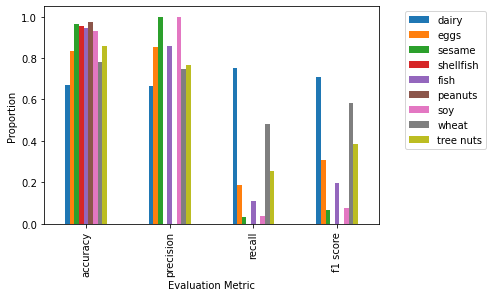

In [598]:
plt.figure(figsize=(500, 500))
newer_df.plot(kind='bar',x="index",y=list_allergies)
plt.legend(loc="upper center", bbox_to_anchor=(1.2, 1))
plt.xlabel("Evaluation Metric")
plt.ylabel("Proportion")

In [599]:
idk = newer_df.iloc[3,:]
idk = idk.reset_index().rename(columns = {"index": "allergen", 3: "f1 score"})
idk = idk.iloc[2:13,:].reset_index()
idk = idk.drop(columns = "index")
idk

,allergen,f1 score
0,eggs,0.30622
1,sesame,0.0645161
2,shellfish,0
3,fish,0.195122
4,peanuts,0
5,soy,0.0757576
6,wheat,0.584885
7,tree nuts,0.382872


Text(0, 0.5, 'F1 Score')

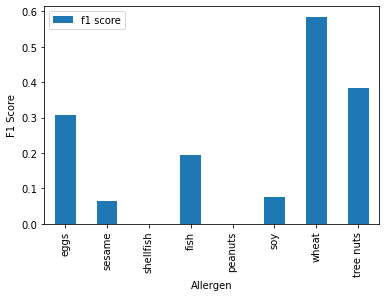

In [600]:
idk.plot(kind = 'bar', x = 'allergen', y = "f1 score")
plt.xlabel("Allergen")
plt.ylabel("F1 Score")

In [601]:
pd.set_option("max_rows", 8)
renamed_appendages[renamed_appendages["sesame"] == 1.0].groupby('recipe element').count().sort_values(by = ["sesame"], ascending = False)



,dairy,eggs,sesame,shellfish,fish,peanuts,soy,wheat,tree nuts
recipe element,,,,,,,,,
salad,10,10,10,10,10,10,10,10,10
sesame,10,10,10,10,10,10,10,10,10
chicken,10,10,10,10,10,10,10,10,10
guksu,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...
garlic,1,1,1,1,1,1,1,1,1
fire,1,1,1,1,1,1,1,1,1
egg,1,1,1,1,1,1,1,1,1
yakitori,1,1,1,1,1,1,1,1,1


In [674]:

renamed_appendages[renamed_appendages["shellfish"] == 1.0].groupby('recipe element').count().sort_values(by = ["shellfish"], ascending = False)[['shellfish']]


,shellfish
recipe element,
prawn,23
prawns,8
curry,8
fried,6
rice,6
...,...
krapi,1
konju,1
klukh,1


In [603]:

renamed_appendages[renamed_appendages["peanuts"] == 1.0].groupby('recipe element').count().sort_values(by = ["peanuts"], ascending = False)


,dairy,eggs,sesame,shellfish,fish,peanuts,soy,wheat,tree nuts
recipe element,,,,,,,,,
salad,15,15,15,15,15,15,15,15,15
peanut,7,7,7,7,7,7,7,7,7
chicken,6,6,6,6,6,6,6,6,6
rice,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...
in,1,1,1,1,1,1,1,1,1
hyderabadi,1,1,1,1,1,1,1,1,1
handi,1,1,1,1,1,1,1,1,1
wrapped,1,1,1,1,1,1,1,1,1


In [604]:
appendages

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,almond
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,strawberry
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,cream
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,tricolour
...,...,...,...,...,...,...,...,...,...,...
8035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,kaju
8036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,roll
8038,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,chocolate
8039,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,samosa


In [605]:
#2,3,5 are indices we want (sesame, shellfish, peanuts)
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop = stop.append(["and", "with", "&"])
appendages['no_stopwords'] = appendages.loc[:,9].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/altheachan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TypeError: argument of type 'NoneType' is not iterable

In [606]:
appendages['no_stopwords'].replace('', np.nan, inplace=True)
appendages = appendages.dropna()
appendages

KeyError: 'no_stopwords'

In [ ]:
#3
X3 = appendages.iloc[:, 9].values
y3 = appendages.iloc[:, 3].values

# Building a TF IDF matrix out of the corpus of reviews
td3 = TfidfVectorizer(max_features = 4500)
X3 = td3.fit_transform(X3).toarray()

from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.3,
                                                    random_state = 0)

# Training the classifier & predicting on test data
from sklearn.naive_bayes import MultinomialNB
classifier3 = MultinomialNB()
classifier3.fit(X_train3, y_train3)

y_pred3 = classifier3.predict(X_test3)

# Classification metrics
from sklearn.metrics import accuracy_score, classification_report
classification_report3 = classification_report(y_test3, y_pred3)

In [607]:
print('\n', classification_report3)


               precision    recall  f1-score   support

         0.0       0.95      1.00      0.98      1103
         1.0       0.00      0.00      0.00        52

    accuracy                           0.95      1155
   macro avg       0.48      0.50      0.49      1155
weighted avg       0.91      0.95      0.93      1155



In [608]:
df_final_recipe

,Recipe Name,Recipe Ingredients,dairy,eggs,sesame,shellfish,fish,peanuts,soy,wheat,tree nuts,Split Recipe Name
0,almond strawberry cream recipe,"[1/2, cup, almonds, 12-14, pieces, fresh, stra...",1,0,0,0,0,0,0,0,1,"[almond, strawberry, cream, recipe]"
1,tricolour salad recipe,"[for, dressing:, 1/3, cup, vinegar, 3, tbsp, h...",0,0,0,0,0,1,1,0,0,"[tricolour, salad, recipe]"
2,chocolate nero cookies recipe,"[1, almonds, 2, eggs, 1/3, granulated, sugar, ...",1,1,0,0,0,0,0,1,1,"[chocolate, nero, cookies, recipe]"
3,broccoli and almond soup recipe,"[800, ml, vegetable, stock, 700, gms, broccoli...",1,0,0,0,0,0,0,0,1,"[broccoli, and, almond, soup, recipe]"
...,...,...,...,...,...,...,...,...,...,...,...,...
1913,steamed sandesh recipe,"[7, litre, milk, 300, sugar, 10, green, cardam...",1,0,0,0,0,0,0,0,0,"[steamed, sandesh, recipe]"
1914,ariselu recipe,"[1/2, cup, rice, 1/2, cup, jaggery, 1, cup, wa...",1,0,1,0,0,0,0,0,0,"[ariselu, recipe]"
1915,anjeer kaju roll recipe,"[1, kg, cashew, nuts, 500, gms, figs, 500, gms...",0,0,0,0,0,0,0,0,1,"[anjeer, kaju, roll, recipe]"
1916,chocolate samosa recipe,"[for, dough:, 1, kg, refined, flour, 350, gms,...",1,0,0,0,0,0,0,1,1,"[chocolate, samosa, recipe]"


In [669]:
prop_df_idk = df_final_recipe[list_allergies].apply(pd.Series.value_counts)
prop_df_idk = prop_df_idk.iloc[1, :]
prop_df_idk

dairy        1016
eggs          343
sesame         73
shellfish      59
fish          103
peanuts        59
soy           132
wheat         578
tree nuts     325
Name: 1, dtype: int64

Text(0.5, 1.0, 'Number of Allergens in Recipe Strings')

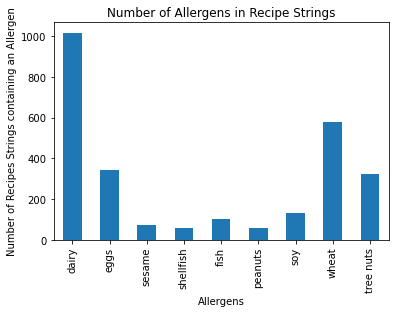

In [671]:
prop_df_idk.plot(kind = 'bar')
plt.xlabel("Allergens")
plt.ylabel("Number of Recipes Strings containing an Allergen")
plt.title("Number of Allergens in Recipe Strings")

In [611]:
#peanut
renamed_appendages[renamed_appendages["peanuts"] == 1.0].groupby('recipe element').count().sort_values(by = ["peanuts"], ascending = False)


,dairy,eggs,sesame,shellfish,fish,peanuts,soy,wheat,tree nuts
recipe element,,,,,,,,,
salad,15,15,15,15,15,15,15,15,15
peanut,7,7,7,7,7,7,7,7,7
chicken,6,6,6,6,6,6,6,6,6
rice,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...
in,1,1,1,1,1,1,1,1,1
hyderabadi,1,1,1,1,1,1,1,1,1
handi,1,1,1,1,1,1,1,1,1
wrapped,1,1,1,1,1,1,1,1,1


Text(0, 0.5, 'Sensitivity Values')

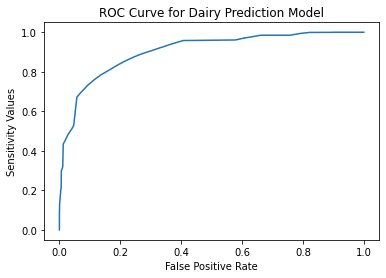

In [612]:
from sklearn.metrics import roc_curve
#let's do it for diary
# Note that you'll want to use the .predict_proba(...) method for your classifier
# instead of .predict(...) so you get probabilities, not classes

model_probabilities = classifier.predict_proba(X_train0)[:, 1]
false_positive_rate_values, sensitivity_values, thresholds = roc_curve(y_train0, model_probabilities, pos_label=1)
plt.plot(false_positive_rate_values, sensitivity_values)
plt.title("ROC Curve for Dairy Prediction Model")
plt.xlabel("False Positive Rate")
plt.ylabel("Sensitivity Values")

Text(0, 0.5, 'Sensitivity Values')

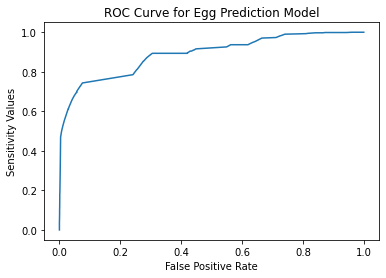

In [613]:
model_probabilities1 = classifier1.predict_proba(X_train1)[:, 1]
false_positive_rate_values1, sensitivity_values1, thresholds1 = roc_curve(y_train1, model_probabilities1, pos_label=1)
plt.plot(false_positive_rate_values1, sensitivity_values1)
plt.title("ROC Curve for Egg Prediction Model")
plt.xlabel("False Positive Rate")
plt.ylabel("Sensitivity Values")

Text(0, 0.5, 'Sensitivity Values')

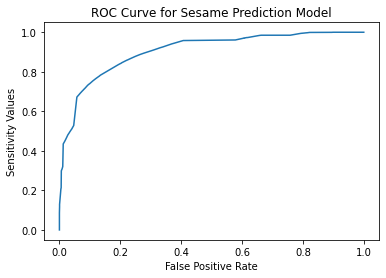

In [614]:
model_probabilities2 = classifier2.predict_proba(X_train2)[:, 1]
false_positive_rate_values2, sensitivity_values2, thresholds2 = roc_curve(y_train2, model_probabilities2, pos_label=1)
plt.plot(false_positive_rate_values, sensitivity_values)
plt.title("ROC Curve for Sesame Prediction Model")
plt.xlabel("False Positive Rate")
plt.ylabel("Sensitivity Values")

Text(0, 0.5, 'Sensitivity Values')

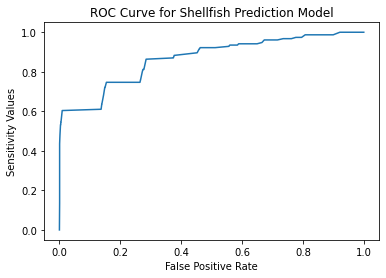

In [615]:
model_probabilities3 = classifier3.predict_proba(X_train3)[:, 1]
false_positive_rate_values3, sensitivity_values3, thresholds3 = roc_curve(y_train3, model_probabilities3, pos_label=1)
plt.plot(false_positive_rate_values3, sensitivity_values3)
plt.title("ROC Curve for Shellfish Prediction Model")
plt.xlabel("False Positive Rate")
plt.ylabel("Sensitivity Values")

Text(0, 0.5, 'Sensitivity Values')

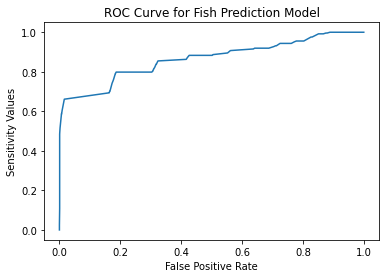

In [616]:
model_probabilities4 = classifier4.predict_proba(X_train4)[:, 1]
false_positive_rate_values4, sensitivity_values4, thresholds4 = roc_curve(y_train4, model_probabilities4, pos_label=1)
plt.plot(false_positive_rate_values4, sensitivity_values4)
plt.title("ROC Curve for Fish Prediction Model")
plt.xlabel("False Positive Rate")
plt.ylabel("Sensitivity Values")

Text(0, 0.5, 'Sensitivity Values')

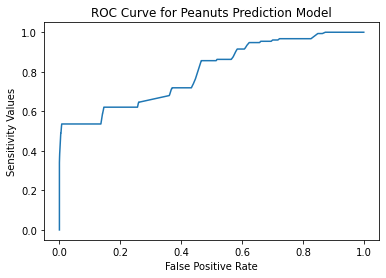

In [617]:
model_probabilities5 = classifier5.predict_proba(X_train5)[:, 1]
false_positive_rate_values5, sensitivity_values5, thresholds5 = roc_curve(y_train5, model_probabilities5, pos_label=1)
plt.plot(false_positive_rate_values5, sensitivity_values5)
plt.title("ROC Curve for Peanuts Prediction Model")
plt.xlabel("False Positive Rate")
plt.ylabel("Sensitivity Values")

Text(0, 0.5, 'Sensitivity Values')

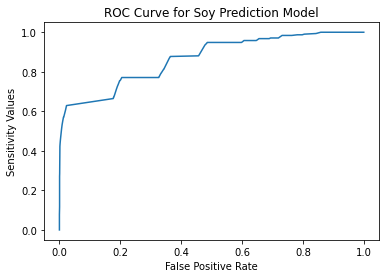

In [618]:
model_probabilities6 = classifier6.predict_proba(X_train6)[:, 1]
false_positive_rate_values6, sensitivity_values6, thresholds6 = roc_curve(y_train6, model_probabilities6, pos_label=1)
plt.plot(false_positive_rate_values6, sensitivity_values6)
plt.title("ROC Curve for Soy Prediction Model")
plt.xlabel("False Positive Rate")
plt.ylabel("Sensitivity Values")

Text(0, 0.5, 'Sensitivity Values')

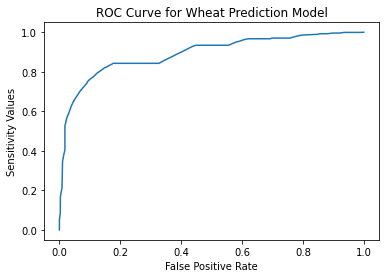

In [635]:
model_probabilities7 = classifier7.predict_proba(X_train7)[:, 1]
false_positive_rate_values7, sensitivity_values7, thresholds7 = roc_curve(y_train7, model_probabilities7, pos_label=1)
plt.plot(false_positive_rate_values7, sensitivity_values7)
plt.title("ROC Curve for Wheat Prediction Model")
plt.xlabel("False Positive Rate")
plt.ylabel("Sensitivity Values")

Text(0, 0.5, 'Sensitivity Values')

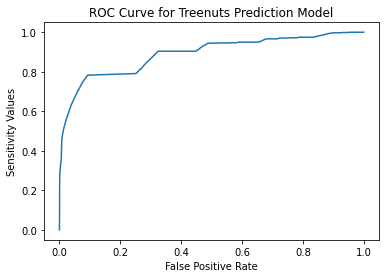

In [636]:
model_probabilities8 = classifier8.predict_proba(X_train8)[:, 1]
false_positive_rate_values8, sensitivity_values8, thresholds8 = roc_curve(y_train8, model_probabilities8, pos_label=1)
plt.plot(false_positive_rate_values8, sensitivity_values8)
plt.title("ROC Curve for Treenuts Prediction Model")
plt.xlabel("False Positive Rate")
plt.ylabel("Sensitivity Values")

In [621]:

renamed_appendages[renamed_appendages["tree nuts"] == 1.0].groupby('recipe element').count().sort_values(by = ["tree nuts"], ascending = False)

,dairy,eggs,sesame,shellfish,fish,peanuts,soy,wheat,tree nuts
recipe element,,,,,,,,,
almond,61,61,61,61,61,61,61,61,61
chocolate,24,24,24,24,24,24,24,24,24
kheer,20,20,20,20,20,20,20,20,20
ki,17,17,17,17,17,17,17,17,17
...,...,...,...,...,...,...,...,...,...
linzer,1,1,1,1,1,1,1,1,1
low,1,1,1,1,1,1,1,1,1
malabar,1,1,1,1,1,1,1,1,1
zafrani,1,1,1,1,1,1,1,1,1


In [622]:
list_allergies

['dairy',
 'eggs',
 'sesame',
 'shellfish',
 'fish',
 'peanuts',
 'soy',
 'wheat',
 'tree nuts']

In [623]:

renamed_appendages[renamed_appendages["wheat"] == 1.0].groupby('recipe element').count().sort_values(by = ["wheat"], ascending = False)


,dairy,eggs,sesame,shellfish,fish,peanuts,soy,wheat,tree nuts
recipe element,,,,,,,,,
pasta,40,40,40,40,40,40,40,40,40
paratha,30,30,30,30,30,30,30,30,30
baked,29,29,29,29,29,29,29,29,29
chocolate,29,29,29,29,29,29,29,29,29
...,...,...,...,...,...,...,...,...,...
pav,1,1,1,1,1,1,1,1,1
paya,1,1,1,1,1,1,1,1,1
dessert,1,1,1,1,1,1,1,1,1
lemongrass,1,1,1,1,1,1,1,1,1


<AxesSubplot:>

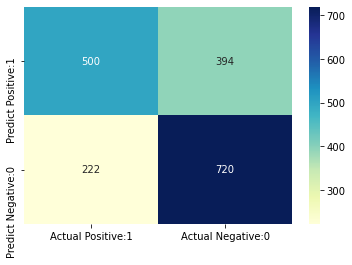

In [637]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [638]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.69463869 0.67365967 0.63403263 0.62703963 0.69859813 0.64953271
 0.67990654 0.69392523 0.67990654 0.66588785]


In [639]:
scores1 = cross_val_score(classifier1, X_train1, y_train1, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores1))

Cross-validation scores:[0.83910891 0.8490099  0.86881188 0.83663366 0.85148515 0.86633663
 0.8539604  0.83910891 0.85148515 0.86848635]


In [627]:
scores2 = cross_val_score(classifier2, X_train2, y_train2, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores2))

Cross-validation scores:[0.96287129 0.96287129 0.96534653 0.96039604 0.96287129 0.96039604
 0.96287129 0.96039604 0.96287129 0.96277916]


In [629]:
scores3 = cross_val_score(classifier3, X_train3, y_train3, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores3))

Cross-validation scores:[0.96753247 0.96753247 0.96536797 0.96536797 0.96536797 0.96536797
 0.96746204 0.96746204 0.96746204 0.96746204]


In [630]:
scores4 = cross_val_score(classifier4, X_train4, y_train4, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores4))

Cross-validation scores:[0.94059406 0.94059406 0.94059406 0.94306931 0.93811881 0.94306931
 0.94554455 0.94306931 0.94059406 0.94292804]


In [631]:
scores5 = cross_val_score(classifier5, X_train5, y_train5, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores5))

Cross-validation scores:[0.96753247 0.96753247 0.96753247 0.96536797 0.96536797 0.96536797
 0.96746204 0.96746204 0.96746204 0.96746204]


In [632]:
scores6 = cross_val_score(classifier6, X_train6, y_train6, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.69463869 0.67365967 0.63403263 0.62703963 0.69859813 0.64953271
 0.67990654 0.69392523 0.67990654 0.66588785]


In [633]:
scores7 = cross_val_score(classifier7, X_train7, y_train7, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores7))

Cross-validation scores:[0.77970297 0.79207921 0.77970297 0.76980198 0.81683168 0.77475248
 0.77227723 0.78960396 0.78960396 0.78908189]


In [634]:
scores8 = cross_val_score(classifier8, X_train8, y_train8, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores8))

Cross-validation scores:[0.86138614 0.85891089 0.86138614 0.84405941 0.85643564 0.84653465
 0.84653465 0.86138614 0.86138614 0.85111663]


In [651]:
pd.set_option("max_rows", None)
score_array = [scores, scores1, scores2, scores3, scores4,scores5,scores6,scores7, scores8]
kfold_df = pd.DataFrame(score_array, list_allergies).rename(columns = {0:"1st Fold", 1:"2nd Fold", 2:"3rd Fold", 3: "4th Fold", 
                                                           4: "5th Fold", 5: "6th Fold", 6: "7th Fold", 7: "8th Fold", 8: "9th Fold", 
                                                           9: "10th Fold"})
kfold_df

,1st Fold,2nd Fold,3rd Fold,4th Fold,5th Fold,6th Fold,7th Fold,8th Fold,9th Fold,10th Fold
dairy,0.694639,0.673660,0.634033,0.627040,0.698598,0.649533,0.679907,0.693925,0.679907,0.665888
eggs,0.839109,0.849010,0.868812,0.836634,0.851485,0.866337,0.853960,0.839109,0.851485,0.868486
sesame,0.962871,0.962871,0.965347,0.960396,0.962871,0.960396,0.962871,0.960396,0.962871,0.962779
shellfish,0.967532,0.967532,0.965368,0.965368,0.965368,0.965368,0.967462,0.967462,0.967462,0.967462
fish,0.940594,0.940594,0.940594,0.943069,0.938119,0.943069,0.945545,0.943069,0.940594,0.942928
peanuts,0.967532,0.967532,0.967532,0.965368,0.965368,0.965368,0.967462,0.967462,0.967462,0.967462
soy,0.933168,0.923267,0.923267,0.918317,0.928218,0.923267,0.925743,0.928218,0.928218,0.925558
wheat,0.779703,0.792079,0.779703,0.769802,0.816832,0.774752,0.772277,0.789604,0.789604,0.789082
tree nuts,0.861386,0.858911,0.861386,0.844059,0.856436,0.846535,0.846535,0.861386,0.861386,0.851117


In [660]:
col_list = ["1st Fold", "2nd Fold","3rd Fold",  "4th Fold",  "5th Fold", "6th Fold","7th Fold","8th Fold", "9th Fold",  "10th Fold"]
kfold_df['mean'] = kfold_df.sum(axis=1)/11
kfold_df

,1st Fold,2nd Fold,3rd Fold,4th Fold,5th Fold,6th Fold,7th Fold,8th Fold,9th Fold,10th Fold,mean
dairy,0.694639,0.673660,0.634033,0.627040,0.698598,0.649533,0.679907,0.693925,0.679907,0.665888,0.676410
eggs,0.839109,0.849010,0.868812,0.836634,0.851485,0.866337,0.853960,0.839109,0.851485,0.868486,0.860967
sesame,0.962871,0.962871,0.965347,0.960396,0.962871,0.960396,0.962871,0.960396,0.962871,0.962779,0.971991
shellfish,0.967532,0.967532,0.965368,0.965368,0.965368,0.965368,0.967462,0.967462,0.967462,0.967462,0.976305
fish,0.940594,0.940594,0.940594,0.943069,0.938119,0.943069,0.945545,0.943069,0.940594,0.942928,0.951236
peanuts,0.967532,0.967532,0.967532,0.965368,0.965368,0.965368,0.967462,0.967462,0.967462,0.967462,0.976523
soy,0.933168,0.923267,0.923267,0.918317,0.928218,0.923267,0.925743,0.928218,0.928218,0.925558,0.934981
wheat,0.779703,0.792079,0.779703,0.769802,0.816832,0.774752,0.772277,0.789604,0.789604,0.789082,0.793197
tree nuts,0.861386,0.858911,0.861386,0.844059,0.856436,0.846535,0.846535,0.861386,0.861386,0.851117,0.863463
